# Expresso Churn Prediction Challenge - NsrommaUoG - Position_3


## SET-UP
1.	We used the data provided by Zindi Africa (retrieved from https://zindi.africa/hackathons/umojahack-ghana-expresso-churn-prediction-challenge/data). The dataset folder included the Train.csv for trainning our model, a Test.csv file upon which we validated the accuracy of our models. The dataset also provided us with a VariableDefinitions.csv file and a SampleSubmission.csv file.

2.	We leveraged on the Starter Notebook provided by Zindi Africa and Google collaboratory was the online platform we used for our work.


## INSTRUCTIONS ON RUNNING THE NOTEBOOK
Option 1: Running the notebook locally(In Jupyter Notebook or Any Other Means)
1.	Ensure the Train.csv, Test.csv and SampleSubmision.csv files are in the same folder as the Expresso_Customer_Churn_NsrommaUoG_Position_3_Winning_Code.ipynb notebook.
2.	Update the path of the above mentioned files inside the notebook and then run the notebook
3.	Do ensure to have the latest version of the xgboost package installed before running the notebook

Option 2: Running the notebook via Google Collaboratory
1.	Upload the Train.csv, Test.csv and SampleSubmision.csv files into your Google drive.
2.	Update the path of the above mentioned files inside the pandas(pd) .read_csv dataFrame and then run the notebook.


#### Mounting Google drive to get access to dataset that has been uploaded to a folder in the cloud drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#importing datasets from Google drive
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

## ANALYSIS OF THE DATASET AND PREPROCESSING FOR BUILDING MODEL(S)

In [4]:
#Viewing the head(first 5 rows) of the train dataset
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
#Viewing the tail(last 5 rows) in the train dataset
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [6]:
#Viewing the matrix layout(number of columns and rows) of the train dataset
train.shape

(2154048, 19)

In [7]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [8]:
#Viewing the head(first 5 rows) of the test dataset
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [9]:
#Viewing the tail(last 5 rows) of the test dataset
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [10]:
# Viewing the matrix shape (number of columns and rows) in the test dataset

test.shape

(380127, 18)

In [11]:
# Viewing the data types of the test file

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [12]:
#Viewing the head(first 5 rows of the submission data file)

submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [13]:
# Viewing the shape(matrix layout with number of rows and columns) in the submission data file

submission.shape

(380127, 2)

#### Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

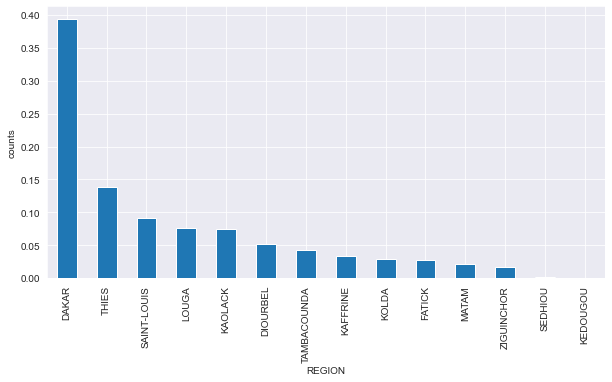

In [14]:
# Checking the number of levels for the REGION feature
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

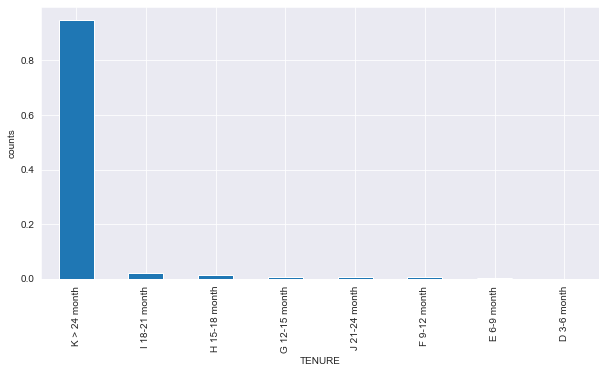

In [15]:
# Checking the number of levels for the TENURE feature
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

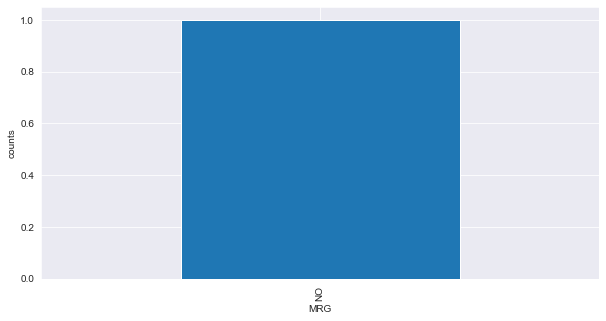

In [16]:
# Checking the number of levels for the REGION feature

print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                   317802
On net 200F=Unlimited _call24H          152295
Data:490F=1GB,7d                        115180
Data: 100 F=40MB,24H                     84649
Mixt 250F=Unlimited_call24H              67512
                                         ...  
GPRS_5Go_7D_PORTAL                           1
MegaChrono_3000F=12500F TOUS RESEAUX         1
YMGX on-net 100=700F, 24H                    1
Data_Mifi_10Go                               1
pilot_offer4                                 1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

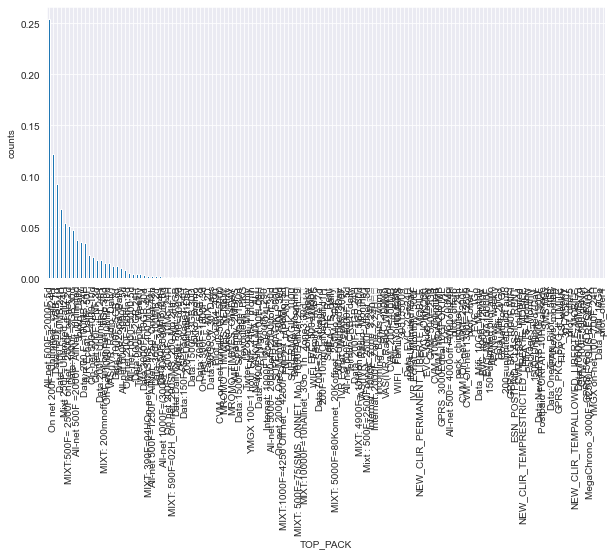

In [17]:
#Viewing the number of levels in TOP_PACK
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

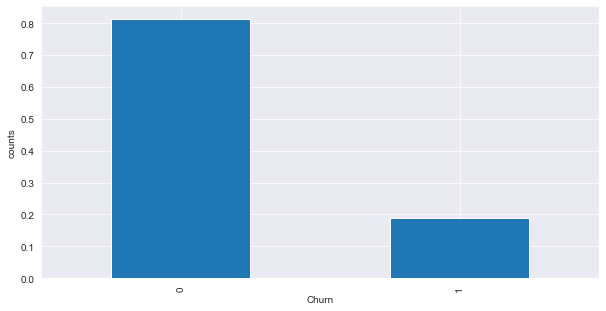

In [18]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [19]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [20]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [21]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

#### We will drop REGION, TOP_PACK, and MRG
#### We will also replace the missing values for the numerical columns with their means (averages)

In [22]:
# Dropping the REGION, MRG and TOP_PACK columns in the train data file
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) 

In [23]:
#Viewing the head of the updated train data file
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0


In [24]:
# Viewing information on the data file to ensure the columns have been deleted
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   ARPU_SEGMENT    float64
 6   FREQUENCE       float64
 7   DATA_VOLUME     float64
 8   ON_NET          float64
 9   ORANGE          float64
 10  TIGO            float64
 11  ZONE1           float64
 12  ZONE2           float64
 13  REGULARITY      int64  
 14  FREQ_TOP_PACK   float64
 15  CHURN           int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 262.9+ MB


In [25]:
# Dropping the REGION, MRG and TOP_PACK columns in the test data file

test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [26]:
# Viewing the head of the test data file

test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [27]:
#Fill NAs for train data

In [28]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

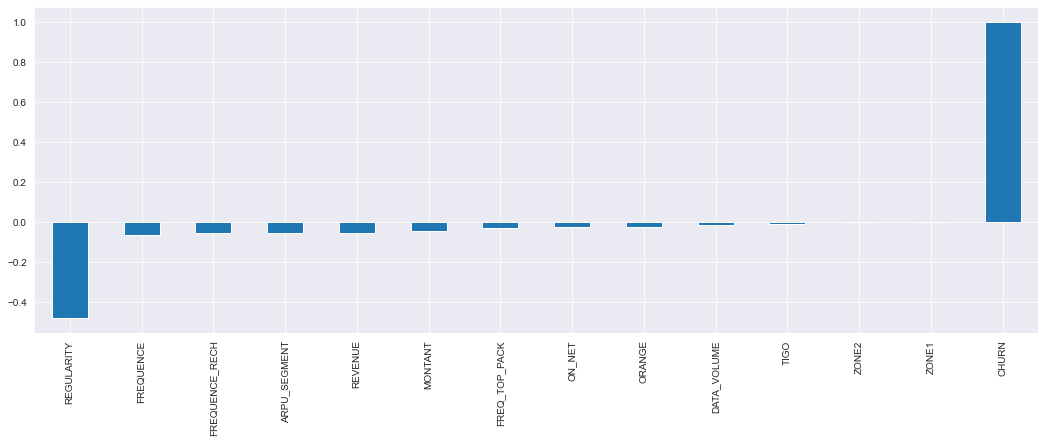

In [29]:
#We plot the correlation between the features and the target variable (CHURN) to to help remove some features not relevant to the model(s)

train.corr()['CHURN'].sort_values().plot(kind='bar', figsize=(18, 6)) 

#### From the correlation graph above, it can be observed that ZONE1 and ZONE2 have no correlation with the target variable (CHURN), hence they are removed.

In [30]:
# Remove the ZONE1 and ZONE2 variables

train = train.drop(['ZONE1', 'ZONE2'], axis = 1)

In [31]:
#Viewing the head of the updated train data file

train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,54,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,4,9.272461,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,17,1.000000,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,62,11.000000,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,11,2.000000,0


In [32]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [33]:
#Fill NAs for test data

In [34]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [35]:
#Dropping ZONE1 and ZONE2 in the test dataset
test = test.drop(['ZONE1', 'ZONE2'], axis = 1)

In [36]:
# Viewing the head of the test data file

test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,42,5.000000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,41,1.000000
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,57,22.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,9,9.261584
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,10,9.261584


In [37]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning
#### In this section, we import the necessary modules and libraries to help us build as many models as necessary to train our dataset and test it's efficiency using the log_loss metric in sklearn.

In [38]:
# Importing some modules from the sklearn library

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [39]:
# Separating the train data file into its component features and target variable
dropcols = ['user_id', 'CHURN']
y = train['CHURN']                            # Target variable
x = train.drop(columns=dropcols, axis=1)      # Other features 
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the result from the model

# Viewing the shapes of the resulting data files
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 12)
(2154048,)
(380127, 12)


#### Split training data into train and test split

In [40]:
# Splitting data for building models with sklearn's train_test_split module and viewing the shapes of the resulting data files

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1938643, 12)
(1938643,)
(215405, 12)
(215405,)


#### Further split X_train and y_train into train and validation sets

In [41]:
# Conducting further spliting

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=1)

In [42]:
#Viewing shapes of the resulting split files

print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
#print(X_val.shape)
#print(y_val.shape)

train
(1938643, 12)
(1938643,)
+++++++
test
(215405, 12)
(215405,)
+++++++
validation


#### Standardize numeric columns using StandardScaler()
This is to help reduce outliers in the data files.



In [43]:
#Columns to be standardized

num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

In [44]:
# Instantiating the StandardScaler()

scaler = StandardScaler()

In [45]:
# Scaling the selected columns in the X_train data file
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [46]:
#Viewing the head of the scaled X_train data file

X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
1439060,K > 24 month,-0.005916,-0.143272,0.083226,0.083053,0.669721,-0.000178,-0.292920,0.329113,-0.499196,0.491496,-0.350428
1146470,K > 24 month,-0.791145,-0.891212,-0.771603,-0.771608,-1.000991,-0.300524,-0.369103,-0.590049,0.344386,-1.034035,-0.885572
1042085,K > 24 month,-0.791145,-0.984704,-0.000395,-0.000395,-0.000389,-0.000178,-0.397852,-0.500686,-0.499196,-0.136664,-0.000180
1502463,K > 24 month,0.692065,0.698160,0.765418,0.765246,0.502650,-0.333646,-0.267047,1.050401,0.344386,0.985050,1.147976
340965,K > 24 month,0.648441,0.978638,0.524885,0.524713,1.003864,-0.000178,0.378354,0.041875,0.121085,1.209393,0.184716


In [47]:
# Scaling the selected columns in the X_test data file
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [48]:
#Viewing the head of the scaled X_test data file
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
671783,K > 24 month,-0.000312,-0.000311,-0.000395,-0.000395,-0.000389,-0.353037,-0.000134,-0.000134,-0.000261,-0.361007,-0.000180
1490471,K > 24 month,-0.887117,-0.891212,-0.829604,-0.829438,-0.666848,-0.000178,-0.387790,-0.590049,-0.499196,-0.719955,-0.000180
28446,K > 24 month,-0.477053,-0.610734,-0.634448,-0.634452,-0.833919,-0.000178,-0.399289,-0.596432,-0.573630,-0.405875,-0.000180
688765,K > 24 month,-0.337457,-0.236764,-0.359627,-0.359631,-0.332706,-0.353037,0.832579,-0.602815,-0.548819,1.478604,-0.564486
193430,K > 24 month,18.281184,9.860422,18.317993,18.318023,6.350142,4.043375,-0.221049,20.346431,2.478152,1.523473,6.285362


In [49]:
# Scaling the selected columns in the test data file
test[num_cols] = scaler.transform(test[num_cols])

In [50]:
#Viewing the head of the scaled test data file
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.093164,-0.610734,-0.087535,-0.087368,-0.750384,-0.002312,0.144055,-0.538985,-0.449574,0.626102,-0.457457
1,I 18-21 month,-0.913291,-0.891212,-0.884875,-0.884709,-0.917455,-0.311425,0.001472,-0.609198,-0.001679,0.581233,-0.885572
2,K > 24 month,-0.389806,1.259115,-0.360480,-0.360654,1.003864,0.396399,-0.399289,-0.596432,-0.449574,1.299130,1.362034
3,K > 24 month,-0.001561,-0.001177,-0.002294,-0.002294,-0.002075,-0.002312,0.001472,-0.001575,-0.001679,-0.854561,-0.001344
4,K > 24 month,-0.001561,-0.001177,-0.002294,-0.002294,-0.002075,-0.002312,0.001472,-0.001575,-0.001679,-0.809692,-0.001344


In [51]:
# Scaling the selected columns in the X_val data file
#X_val[num_cols] = scaler.transform(X_val[num_cols])

In [52]:
#Viewing the head of the scaled X_val data file
#X_val.head()

#### Encode the TENURE column in the X_train, X_test, X_val and test data files with sklearn's LabelEncoder

In [53]:
encoder = LabelEncoder()            # Instantiating the LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [54]:
X_test["TENURE"] = encoder.fit_transform(X_test["TENURE"])

In [55]:
#X_val['TENURE'] = encoder.fit_transform(X_val["TENURE"])

In [56]:
test['TENURE'] = encoder.fit_transform(test["TENURE"])

In [57]:
# Viewing the head of the encoded X_train data file
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
1439060,7,-0.005916,-0.143272,0.083226,0.083053,0.669721,-0.000178,-0.292920,0.329113,-0.499196,0.491496,-0.350428
1146470,7,-0.791145,-0.891212,-0.771603,-0.771608,-1.000991,-0.300524,-0.369103,-0.590049,0.344386,-1.034035,-0.885572
1042085,7,-0.791145,-0.984704,-0.000395,-0.000395,-0.000389,-0.000178,-0.397852,-0.500686,-0.499196,-0.136664,-0.000180
1502463,7,0.692065,0.698160,0.765418,0.765246,0.502650,-0.333646,-0.267047,1.050401,0.344386,0.985050,1.147976
340965,7,0.648441,0.978638,0.524885,0.524713,1.003864,-0.000178,0.378354,0.041875,0.121085,1.209393,0.184716


### BUILDING A RandomForestClassifier MODEL

In [58]:
# Instantiating Classifier model with parameters
rand = RandomForestClassifier(bootstrap=True,
                              n_jobs=-1,
                              max_depth=6,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [59]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


In [60]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.9s finished


In [61]:
#Using the model to make predictions on the test data
subpred = randmodel.predict(test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.6s finished


In [62]:
#Viewing subpred
subpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
#Checking the log loss of the model's prediction
from sklearn.metrics import log_loss          #Importing the log_loss metric from sklearn
print('Logloss')
log_loss(y_test, randpred)

Logloss


4.700194855588535

In [64]:
#Checking the accuracy of the model's prediction
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.8639168078735405

In [ ]:
#Finding the Recall value
#print("Recall")
#recall_score(y_test, randpred)

In [ ]:
#Checking the f1 score
#print("F1 Score")
#f1_score(y_test, randpred)

In [ ]:
#Printing confusion matrix of model's prediction
#print("Confusion Matrix")
#confusion_matrix(y_test, randpred)

### BUILDING A LogisticRegression MODEL

In [ ]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict_proba(X_test)

#Evaluating the log loss
print("Logloss")
log_loss(y_test, lg_pred)

In [ ]:
#Printing the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, lg.predict(X_test)))

In [ ]:
# Using LogisticRegression to make predictions on the test dataset
#sample = lg.predict_proba(test)
#sample.shape    #Viewing the shape/layout of the sample probability matrix

In [ ]:
#Viewing the first five values in the sample dataframe
#sample[:5,1]

### BUILDING A GradientBoostingClassifier MODEL

In [ ]:
#importing the model from sklearn
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(max_depth=3, n_estimators=100, min_samples_leaf=2, subsample=0.5, verbose=0)
GBC.fit(X_train, y_train)
GBC_pred = GBC.predict_proba(X_test)

#Printing the log loss value of the model
print("Logloss")
log_loss(y_test, GBC_pred)

In [ ]:
#Running predictions on the test dataset with the model
GB = GBC.predict_proba(test)

### BUILDING AN  ExtremeGradientBoostingClassifier(XGBClassifier) Model

In [66]:
#Parameter Tuning for the XGBClassifier model
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model = XGBClassifier()

param_grid = {'n_estimators':range(100,1000,100),
              'max_depth': range(1, 10),
              'learning_rate': np.arange(0.01,1),
              'scale_pos_weight':range(1,20),
              'random_state':[0,1,3,42],
              'min_child_weight':range(1,6,1),
              'gamma':[i/10.0 for i in range(0,5)],
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_tree':[i/10.0 for i in range(6,10)],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              'verbosity':[0,1,2,3],
              'max_delta_step':range(0, 10),
              }

clf_cv = RandomizedSearchCV(model, 
                            param_grid,
                            n_jobs = -1)
clf_cv.fit(X_train, y_train)
clf_cv.best_params_

[14:42:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'verbosity': 1,
 'subsample': 0.9,
 'scale_pos_weight': 1,
 'reg_alpha': 0.01,
 'random_state': 3,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 7,
 'max_delta_step': 6,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_tree': 0.7}

In [65]:
#importing XBGClassifier  
from xgboost import XGBClassifier
from sklearn.metrics import log_loss 

XGB = XGBClassifier(max_depth=5,n_estimators=800, scale_pos_weight=1,
                    gamma=0.1, learning_rate=0.01, max_delta_step=1,
                    min_child_weight=2, random_state=42, reg_alpha=0.1,
                    subsample=0.7, verbosity=0)
XGB.fit(X_train, y_train)
xgb_pred = XGB.predict_proba(X_test)

#Printing the log loss value of the model
print("Logloss")
log_loss(y_test, xgb_pred)

Logloss


0.29441676922272103

In [70]:
#USING PARAMETERS FROM RANDOMIZEDSEARCHCV without {colsample_tree:0.7}
#importing XBGClassifier  
from xgboost import XGBClassifier
from sklearn.metrics import log_loss 

XGB = XGBClassifier(max_depth=5,n_estimators=200, scale_pos_weight=1,
                    gamma=0.1, learning_rate=0.01, max_delta_step=6,
                    min_child_weight=5, random_state=3, reg_alpha=0.01,
                    subsample=0.9, verbosity=1, colsample_tree=0.7)
XGB.fit(X_train, y_train)
xgb_pred = XGB.predict_proba(X_test)

#Printing the log loss value of the model
print("Logloss")
log_loss(y_test, xgb_pred)

[15:34:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Logloss


0.323130974567027

In [ ]:
#Making predictions on test dataset with the model
XB = XGB.predict_proba(test)


In [ ]:
#Building an XGBRegressor model
#from xgboost import XGBRegressor

#XGBR = XGBRegressor(max_depth=6, n_estimators=200, learning_rate=0.05, n_jobs=4)
#XGBR.fit(X_train, y_train)
#xgbr_pred = XGBR.predict(X_test)

#Log loss
#print('Log loss')
#log_loss(y_test, xgb_pred)

In [ ]:
#xgbr = XGBR.predict(test)

### Plotting an ROC curve to determine how good the XGBClassifier model is.

In [67]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, GBC_pred[:,1])

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

NameError: name 'GBC_pred' is not defined

### MAKING A SUBMISSION
From the models above, the XGBClassifier yielded the lowest log_loss, making it the most efficient. Hence the final submission file comprised of the predictions from this model.

In [ ]:
#Viewing the head of the submission file
submission.head()

In [ ]:
#Making final submission with the best model prediction(XGBClassifier model). We take the probability of customers churning 
#(index 1 of the predict_proba matrix on the test dataset)
submission["CHURN"] = XB[:,1]

In [ ]:
#Submission for XGBRegressor
#submission["CHURN"] = XB

In [ ]:
#Counting the number of levels in the CHURN column
submission["CHURN"].value_counts()

In [ ]:
#Viewing the head of the submission file
submission.head()

In [ ]:
#Viewing the shape of the submission file
submission.shape

In [ ]:
#Creating a csv submission file
#submission.to_csv('/content/drive/My Drive/EXPRESSO/sample_test11_submission.csv', index=False)
